# West Nile Virus in Chicago: Combined Exploratory Data Analysis
---

In this notebook, we will focus on analysis of the combined train dataset that was constructed in the Feature Engineering phase.

## Content
---

- [Locations](../code/99_Locations.ipynb)
- [Data Cleaning Summary](../code/01_Data_Cleaning.ipynb) 
- [Train-test Investigation](../code/01a_Train_Test_Investigation.ipynb) 
- [Weather Investigation](../code/01b_Weather_Investigation.ipynb) 
- [Spray Investigation](../code/01c_Spray_Investigation.ipynb) 
- [Feature Engineering](../code/02a_Feature_Engineering.ipynb) 
- [Combined EDA and Preprocessing](../code/02b_Combined_EDA_and_Preprocessing.ipynb) **Current Notebook**
- [Model Tuning & Conclusion](../code/03_Model_Tuning_&_Conclusion.ipynb)

## Import library
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import pickle

## Import combined train and test datasets

In [2]:
train_weather_spray = pd.read_csv('../assets/train_weather_spray_combined_daylight.csv')
train_weather_spray.loc[:,'Date'] = pd.to_datetime(train_weather_spray.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
train_weather_spray.loc[:,'Sunrise_datetime'] = pd.to_datetime(train_weather_spray.loc[:,'Sunrise_datetime'], errors='raise')
train_weather_spray.loc[:,'Sunset_datetime'] = pd.to_datetime(train_weather_spray.loc[:,'Sunset_datetime'], errors='raise')
train_weather_spray.loc[:,'week_of_year'] = train_weather_spray.loc[:, 'Date'].apply(lambda x: x.strftime("%W"))
print(train_weather_spray.shape)
train_weather_spray.head(3)

(7370, 86)


,Date,Species,Block,Street,Trap,Latitude,Longitude,WnvPresent,NumMosquitos_sum,species_culex_erraticus,...,CodeSum_TSRA_sum_past21day,CodeSum_DZ_sum_past21day,data_availability_for_21_days,sp_count_past_7_days_25_meters,sp_count_past_7_days_50_meters,sp_count_past_7_days_75_meters,sp_count_past_14_days_25_meters,sp_count_past_14_days_50_meters,sp_count_past_14_days_75_meters,daylight_duration_in_minutes
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0,0,...,1,0,21,0,0,0,0,0,0,896.0
1,2007-05-29,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.954690,-87.800991,0,1.0,0,...,1,0,21,0,0,0,0,0,0,896.0
2,2007-05-29,CULEX RESTUANS,62,N MANDELL AVE,T007,41.994991,-87.769279,0,1.0,0,...,1,0,21,0,0,0,0,0,0,896.0


In [3]:
train_weather_spray.columns

Index(['Date', 'Species', 'Block', 'Street', 'Trap', 'Latitude', 'Longitude',
       'WnvPresent', 'NumMosquitos_sum', 'species_culex_erraticus',
       'species_culex_pipiens', 'species_culex_pipiens_restuans',
       'species_culex_restuans', 'species_culex_salinarius',
       'species_culex_tarsalis', 'species_culex_territans',
       'species_unspecified_culex', 'month_of_year', 'week_of_year',
       'year_and_month', 'year', 'reference_weather_stn', 'Station', 'Tmax',
       'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Sunrise_datetime', 'Sunset_datetime', 'CodeSum_BCFG',
       'CodeSum_BR', 'CodeSum_DZ', 'CodeSum_FG', 'CodeSum_FG+', 'CodeSum_FU',
       'CodeSum_GR', 'CodeSum_HZ', 'CodeSum_MIFG', 'CodeSum_RA', 'CodeSum_SN',
       'CodeSum_SQ', 'CodeSum_TS', 'CodeSum_TSRA', 'CodeSum_VCFG',
       'CodeSum_VCTS', 'Tavg_mean_past7day', 'WetBulb_mean_past7day',
    

In [5]:
test = pd.read_csv('../assets/test_weather_combined_daylight.csv')
test.loc[:,'Date'] = pd.to_datetime(test.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
test.loc[:,'Sunrise_datetime'] = pd.to_datetime(test.loc[:,'Sunrise_datetime'], errors='raise')
test.loc[:,'Sunset_datetime'] = pd.to_datetime(test.loc[:,'Sunset_datetime'], errors='raise')
print(test.shape)
test.head(3)

(116293, 80)


,Id,Date,Species,Block,Street,Trap,Latitude,Longitude,AddressAccuracy,species_culex_erraticus,...,PrecipTotal_mean_past14day,CodeSum_RA_sum_past14day,CodeSum_TSRA_sum_past14day,CodeSum_DZ_sum_past14day,data_availability_for_14_days,CodeSum_RA_sum_past21day,CodeSum_TSRA_sum_past21day,CodeSum_DZ_sum_past21day,data_availability_for_21_days,daylight_duration_in_minutes
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,41.95469,-87.800991,9,0,...,0.218857,9,5,1,14,10,7,1,21,910.0
1,2,2008-06-11,CULEX RESTUANS,41,N OAK PARK AVE,T002,41.95469,-87.800991,9,0,...,0.218857,9,5,1,14,10,7,1,21,910.0
2,3,2008-06-11,CULEX PIPIENS,41,N OAK PARK AVE,T002,41.95469,-87.800991,9,0,...,0.218857,9,5,1,14,10,7,1,21,910.0


In [6]:
spray_cleaned = pd.read_csv('../assets/spray_cleaned.csv')
spray_cleaned.loc[:,'Date'] = pd.to_datetime(spray_cleaned.loc[:,'Date'], format='%Y-%m-%d', errors='raise')
spray_cleaned.loc[:,'year_and_month'] = spray_cleaned.loc[:,'Date'].apply(lambda x: x.strftime('%Y-%m'))
spray_cleaned.loc[:,'week_of_year'] = spray_cleaned.loc[:, 'Date'].apply(lambda x: x.strftime("%W"))
spray_cleaned.head(2)

,Date,Time,Latitude,Longitude,7Daysfterspray,14Daysfterspray,21Daysfterspray,year_and_month,week_of_year
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,2011-09-05,2011-09-12,2011-09-19,2011-08,35
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,2011-09-05,2011-09-12,2011-09-19,2011-08,35


## Inspect columns in combined train dataset

In [7]:
train_weather_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 86 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             7370 non-null   datetime64[ns]
 1   Species                          7370 non-null   object        
 2   Block                            7370 non-null   int64         
 3   Street                           7370 non-null   object        
 4   Trap                             7370 non-null   object        
 5   Latitude                         7370 non-null   float64       
 6   Longitude                        7370 non-null   float64       
 7   WnvPresent                       7370 non-null   int64         
 8   NumMosquitos_sum                 7370 non-null   float64       
 9   species_culex_erraticus          7370 non-null   int64         
 10  species_culex_pipiens            7370 non-null   int64      

From above dataframe information:


- Columns 0 to 16 correspond to the original trap data records in train dataset, including the one-hot encoded species.


- Columns 17 to 20 are engineered from *Date* column in train dataset to aid plotting in Exploratory Data Analysis phase.


- Column 21 was created to facilitate joining of weather and train datasets.


- Columns 22 to 54 encompass same-day weather information that is tied to the trap record that is generated for a given date.


- Columns 55 to 78 encompass the historical weather data, i.e. 7/14/21 rolling day aggregation of weather effects. Columns 64, 74 and 78 (data_availability_for_7_days, data_availability_for_14_days, data_availability_for_21_days) indicate the number of days in which weather data was available, as a gauge of how representative the historical weather data is for a given trap record.


- Columns 79 to 84 encompass the historical spray data, i.e. 7/14 rolling day aggregation of nearby sprays, defined by distance values 25m, 50m and 75m.


- Column 85 indicates the amount of daylight for a given day, in minutes.

In [8]:
# TAKEOUT
#wnv_present_df = train_weather_spray.loc[(train_weather_spray.loc[:,'WnvPresent']==1) & \
#(train_weather_spray.loc[:,'data_availability_for_7_days']>5) & \
#(train_weather_spray.loc[:,'data_availability_for_14_days']>10) & \
#(train_weather_spray.loc[:,'data_availability_for_21_days']>20) \
#,:]

In [9]:
# TAKEOUT
#wnv_absent_df = train_weather_spray.loc[(train_weather_spray.loc[:,'WnvPresent']==0) & \
#(train_weather_spray.loc[:,'data_availability_for_7_days']>5) & \
#(train_weather_spray.loc[:,'data_availability_for_14_days']>10) & \
#(train_weather_spray.loc[:,'data_availability_for_21_days']>20) \
#,:]

In [10]:
#wnv_present_df.describe()

## Create column for name of month

In [14]:
calendar_dict = {i: calendar.month_abbr[i] for i in range(1,13)}
calendar_month_order = [calendar.month_abbr[i] for i in range(1,13)]
train_weather_spray.loc[:,'month_name'] = train_weather_spray.loc[:,'month_of_year'].apply(lambda x: calendar.month_abbr[x])

In [15]:
combined_stats_by_month_df = train_weather_spray \
                                .groupby('month_name') \
                                .agg(
                                    wetbulb_mean=('WetBulb','mean'), 
                                    wnvpresent_mean=('WnvPresent','mean'),
                                    precip_mean=('PrecipTotal','mean'))
combined_stats_by_month_df.loc[:,'month_name'] = combined_stats_by_month_df.index
combined_stats_by_month_df.reset_index(drop=True, inplace=True)
combined_stats_by_month_df

,wetbulb_mean,wnvpresent_mean,precip_mean,month_name
0,67.648772,0.107782,0.170130,Aug
1,66.045977,0.019157,0.154331,Jul
2,61.281595,0.000848,0.198400,Jun
3,57.913043,0.000000,0.000000,May
4,58.638767,0.008811,0.145771,Oct
5,61.455255,0.060060,0.020217,Sep


## Analysis of Combined Data
---

#### Aggregate weather and spray information by year_and_month

In [16]:
combined_stats_by_year_and_month_df = train_weather_spray \
                                        .groupby('year_and_month') \
                                        .agg(
                                            record_count=('year_and_month','count'),
                                            wetbulb_mean=('WetBulb','mean'), 
                                            tavg_mean=('Tavg','mean'),
                                            dewpoint_mean=('DewPoint','mean'),
                                            wnvpresent_sum=('WnvPresent','sum'),
                                            NumMosquitos_sum=('NumMosquitos_sum','sum'),
                                            precip_mean=('PrecipTotal','mean'),
                                            daylight_duration_mean=('daylight_duration_in_minutes','mean'))
combined_stats_by_year_and_month_df.loc[:,'year_and_month'] = combined_stats_by_year_and_month_df.index
combined_stats_by_year_and_month_df.reset_index(drop=True, inplace=True)
combined_stats_by_year_and_month_df.loc[:,'year'] = combined_stats_by_year_and_month_df.loc[:,'year_and_month'].apply(lambda x: int(x.split('-')[0]))
combined_stats_by_year_and_month_df.loc[:,'month_name'] = combined_stats_by_year_and_month_df.loc[:,'year_and_month'].apply(lambda x: calendar.month_name[int(x.split('-')[1])])

spray_cleaned_by_year_and_month = spray_cleaned \
                                        .groupby('year_and_month') \
                                        .agg(spray_count=('year_and_month','count'))
spray_cleaned_by_year_and_month.loc[:,'year_and_month'] = spray_cleaned_by_year_and_month.index
spray_cleaned_by_year_and_month.reset_index(drop=True, inplace=True)
spray_cleaned_by_year_and_month

combined_stats_by_year_and_month_df = pd.merge(left=combined_stats_by_year_and_month_df, right=spray_cleaned_by_year_and_month, how='left', left_on='year_and_month', right_on='year_and_month')
combined_stats_by_year_and_month_df.fillna(0, inplace=True)
combined_stats_by_year_and_month_df

,record_count,wetbulb_mean,tavg_mean,dewpoint_mean,wnvpresent_sum,NumMosquitos_sum,precip_mean,daylight_duration_mean,year_and_month,year,month_name,spray_count
0,23,65.739130,76.217391,58.739130,0,37.0,0.000000,896.000000,2007-05,2007,May,0.0
1,167,61.754491,68.323353,57.952096,0,416.0,0.123928,910.305389,2007-06,2007,June,0.0
2,410,64.429268,72.848780,58.953659,1,2852.0,0.280854,895.451220,2007-07,2007,July,0.0
3,1100,71.339091,78.594545,67.754545,132,20913.0,0.265162,838.542727,2007-08,2007,August,0.0
4,551,63.607985,74.221416,56.742287,20,3149.0,0.001561,750.733212,2007-09,2007,September,0.0
5,176,61.431818,69.250000,55.454545,2,1374.0,0.000000,696.363636,2007-10,2007,October,0.0
6,46,54.000000,59.652174,51.000000,0,171.0,0.000000,895.000000,2009-05,2009,May,0.0
7,414,59.396135,67.376812,53.685990,0,6620.0,0.297983,909.222222,2009-06,2009,June,0.0
8,527,62.383302,71.172676,56.396584,5,7981.0,0.046436,890.827324,2009-07,2009,July,0.0
9,276,63.362319,71.123188,58.561594,6,2106.0,0.257138,832.210145,2009-08,2009,August,0.0


#### Define function to generate bar and line plot on a shared x-axis

In [17]:
def combine_plot(dataframe, x_axis_column, barplot_column, lineplot_column, barplot_label, \
                    lineplot_label, barplot_axis_label, lineplot_axis_label, legend_anchor_pos, title, fig_size=(8,6), 
                    shade_boundaries=[], text_labels=[], rotate_xtick_labels=True):
    fig, ax1 = plt.subplots(figsize=fig_size)
    # shading of year boundaries
    for i in shade_boundaries:
        ax1.axvspan(i[0], i[1], alpha=0.1, color='grey') # shade area
    # year labels
    for a in text_labels:
        plt.text(a[0], a[1], a[2], fontsize=12) # text label
    
    if rotate_xtick_labels:
        plt.xticks(rotation=45, ha='right')
    plt.title(title)
    sns.barplot(
        data = dataframe, 
        x=x_axis_column, 
        y=barplot_column, 
        alpha=0.5, 
        color='darkred',
        ax=ax1, 
        label=barplot_label)
    ax1.set_ylabel(barplot_axis_label)

    ax2 = ax1.twinx()
    sns.lineplot( # pointplot has legend issues, use lineplot
        data = dataframe,
        x=x_axis_column,
        y=lineplot_column,
        alpha=0.5, 
        marker='o',
        ax=ax2, 
        sort=False,
        legend=False,
        label=lineplot_label)
    ax2.figure.legend(bbox_to_anchor=legend_anchor_pos)
    ax2.set_ylabel(lineplot_axis_label)
    plt.show()

### Investigate relationship between WNV occurrence and mosquito count across time

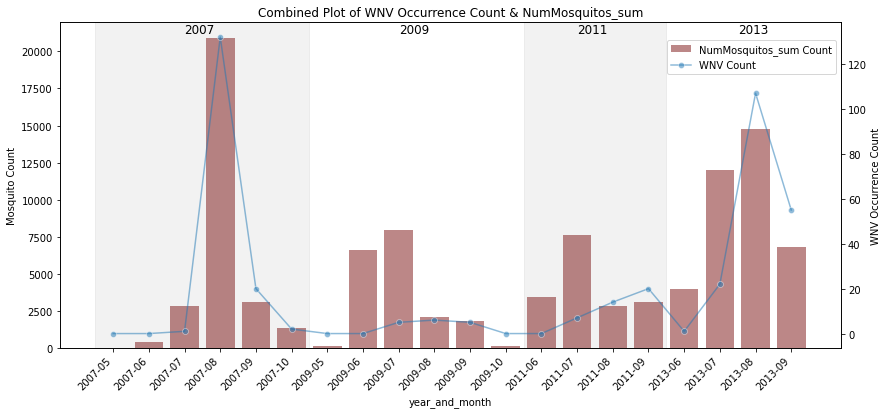

In [18]:
combine_plot(
    dataframe=combined_stats_by_year_and_month_df,
    x_axis_column='year_and_month',
    barplot_column='NumMosquitos_sum',
    lineplot_column='wnvpresent_sum',
    barplot_label='NumMosquitos_sum Count',
    lineplot_label='WNV Count',
    barplot_axis_label='Mosquito Count',
    lineplot_axis_label='WNV Occurrence Count',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of WNV Occurrence Count & NumMosquitos_sum',
    fig_size=(14,6),
    shade_boundaries=[(-0.5, 5.5), (11.5, 15.5)],
    text_labels=[(2, 21200,'2007'),(8, 21200,'2009'),(13, 21200,'2011'),(17.5, 21200, '2013')]
)

Above plot shows that occurrence of West Nile Virus tends to increase alongside high numbers of mosquito count. Both the highest peaks of WNV occurrence count (monthly count exceeding 120) and mosquito count (monthly count exceeding 20000) happened in August 2007. The 2nd highest peaks for both metrics subseuqently happened in August 2013. In other words, we can deduce that in months with high amounts of mosquito breeding, there would likely be a higher incidence rate of traps testing positive for presence West Nile Virus.

This trend alone should underscore the importance of an effective mosquito surveillence program for reducing mosquito breeding.

### Investigate relationship between mosquito count and average wetbulb across time

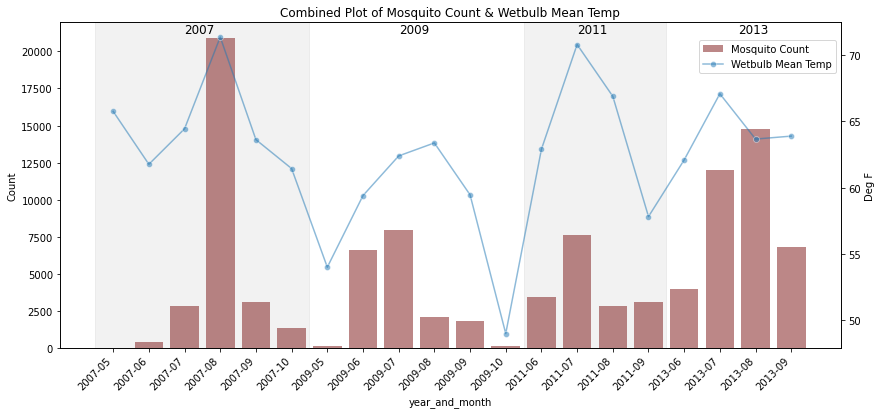

In [19]:
combine_plot(
    dataframe=combined_stats_by_year_and_month_df,
    x_axis_column='year_and_month',
    barplot_column='NumMosquitos_sum',
    lineplot_column='wetbulb_mean',
    barplot_label='Mosquito Count',
    lineplot_label='Wetbulb Mean Temp',
    barplot_axis_label='Count',
    lineplot_axis_label='Deg F',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of Mosquito Count & Wetbulb Mean Temp',
    fig_size=(14,6),
    shade_boundaries=[(-0.5, 5.5), (11.5, 15.5)],
    text_labels=[(2, 21200,'2007'),(8, 21200,'2009'),(13, 21200,'2011'),(17.5, 21200, '2013')]
)

Mosquito count seems to have a positive relationship with mean wetbulb temperature. Where there is an increase in mean temperature between 2 months, it is usually accompanied by an increase in mosquito count. This is observed in instances such as July to August in 2007, and June to July in 2009, 2011 as well as 2013. Consequently, as weather gets cooler towards September/October, the mosquito count tends to drop too, except in the year 2019 where mosquito count continues to drop despite mean temperature climbing very slightly between August and September.

### Investigate relationship between Mosquito Count and Precipitation Mean

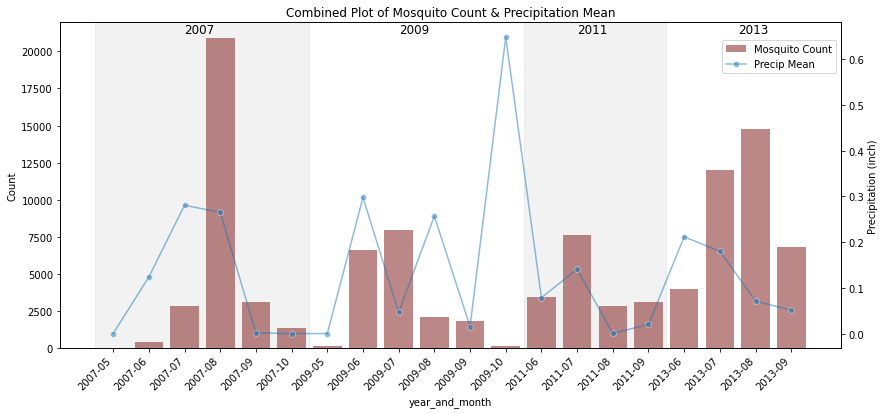

In [20]:
combine_plot(
    dataframe=combined_stats_by_year_and_month_df,
    x_axis_column='year_and_month',
    barplot_column='NumMosquitos_sum',
    lineplot_column='precip_mean',
    barplot_label='Mosquito Count',
    lineplot_label='Precip Mean',
    barplot_axis_label='Count',
    lineplot_axis_label='Precipitation (inch)',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of Mosquito Count & Precipitation Mean',
    fig_size=(14,6),
    shade_boundaries=[(-0.5, 5.5), (11.5, 15.5)],
    text_labels=[(2,21200,'2007'),(8,21200,'2009'),(13,21200,'2011'),(17.5, 21200, '2013')]
)

Looking at 2009, when mean precipitation increased from May to June, it was followed with an increase in mosquito count, however when mean precipitation fell in the following July, mosquito count continued to increase slightly from approximately 6500 to 7500.

In the same year, there was a huge spike in mean precipitation from September to October, but mosquito count fell from approximately 1500 to under 200.

Looking at 2011, the mosquito count seems to be moving in tandem with mean precipitation, i.e. a month-to-month increase in precipitation would result in more mosquitoes.

However in 2013, despite a decrease in mean precipitation from June to August, mosquito count continues to increase in that period.

As such, the conflicting trends observed in the above plot seem to indicate that precipitation does not have a direct relationship with mosquito count.

### Investigate Mosquito Count and Spray Count

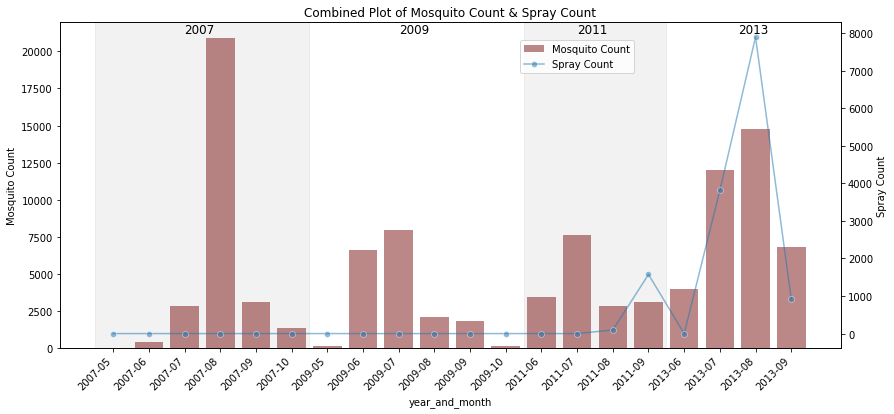

In [21]:
combine_plot(
    dataframe=combined_stats_by_year_and_month_df,
    x_axis_column='year_and_month',
    barplot_column='NumMosquitos_sum',
    lineplot_column='spray_count',
    barplot_label='Mosquito Count',
    lineplot_label='Spray Count',
    barplot_axis_label='Mosquito Count',
    lineplot_axis_label='Spray Count',
    legend_anchor_pos=(0.7, 0.85),
    title='Combined Plot of Mosquito Count & Spray Count',
    fig_size=(14,6),
    shade_boundaries=[(-0.5, 5.5), (11.5, 15.5)],
    text_labels=[(2,21200,'2007'),(8,21200,'2009'),(13,21200,'2011'),(17.5, 21200, '2013')]
)

In Feature Engineering phase, we revealed that the provided spray dataset only covered 10 dates across 2011 and 2013. The above plot further revealed that spraying was conducted within 5 months (August and Septempber in 2011, July, August and September in 2013).

When spraying was carried out in July 2013 at nearly 4000 locations, mosquito count continued to rise from July to August. Only when spraying count was doubled to nearly 8000 in August, then mosquito count dropped from 15000 to below 7500 in September.

Effectiveness of spray cannot be determined clearly from the above plot for 2 likely reasons:

1) There coud be other factors, alongside spray, that contribute a shared impact on mosquito count

2) As far as the provided spray dataset is concerned, there seem to be insufficient data, and/or actual amount of spraying carried out in Chicago, that has led to this inconclusive finding on the efficacy of spraying.

As such, based on the 2nd justification, we would likely not include spray data as a feature for our prediction models.

### Aggregate weather by Month

In [22]:
combined_stats_by_month_df = train_weather_spray \
                                        .groupby('month_of_year') \
                                        .agg(
                                            record_count=('month_of_year','count'),
                                            wetbulb_mean=('WetBulb','mean'), 
                                            tavg_mean=('Tavg','mean'),
                                            wnvpresent_sum=('WnvPresent','sum'),
                                            NumMosquitos_sum=('NumMosquitos_sum','sum'),
                                            precip_mean=('PrecipTotal','mean'))
combined_stats_by_month_df.loc[:,'month_of_year'] = combined_stats_by_month_df.index
combined_stats_by_month_df.reset_index(drop=True, inplace=True)
#combined_stats_by_month_df
#combined_stats_by_year_and_month_df.loc[:,'year'] = combined_stats_by_year_and_month_df.loc[:,'year_and_month'].apply(lambda x: int(x.split('-')[0]))
combined_stats_by_month_df.loc[:,'month_name'] = combined_stats_by_month_df.loc[:,'month_of_year'].apply(lambda x: calendar.month_name[int(x)])
combined_stats_by_month_df

,record_count,wetbulb_mean,tavg_mean,wnvpresent_sum,NumMosquitos_sum,precip_mean,month_of_year,month_name
0,69,57.913043,65.173913,0,208.0,0.000000,5,May
1,1179,61.281595,69.353690,1,14467.0,0.198400,6,June
2,1827,66.045977,74.995621,35,30463.0,0.154331,7,July
3,2403,67.648772,75.447774,259,40635.0,0.170130,8,August
4,1665,61.455255,70.081081,100,14927.0,0.020217,9,September
5,227,58.638767,65.286344,2,1545.0,0.145771,10,October


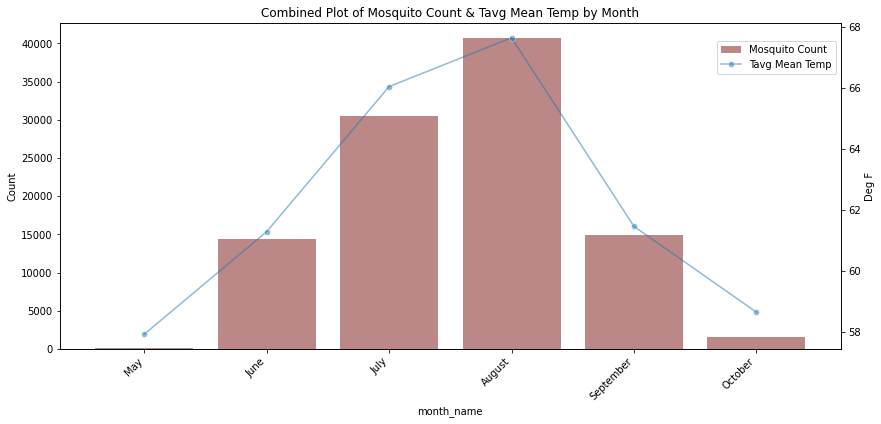

In [23]:
combine_plot(
    dataframe=combined_stats_by_month_df,
    x_axis_column='month_name',
    barplot_column='NumMosquitos_sum',
    lineplot_column='wetbulb_mean',
    barplot_label='Mosquito Count',
    lineplot_label='Tavg Mean Temp',
    barplot_axis_label='Count',
    lineplot_axis_label='Deg F',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of Mosquito Count & Tavg Mean Temp by Month',
    fig_size=(14,6)
)

From above plot, August is the hottest month in the train dataset, and it yields the highest mosquito count too. Again, we have can observe here that high temperature is conducive for mosquito breeding.

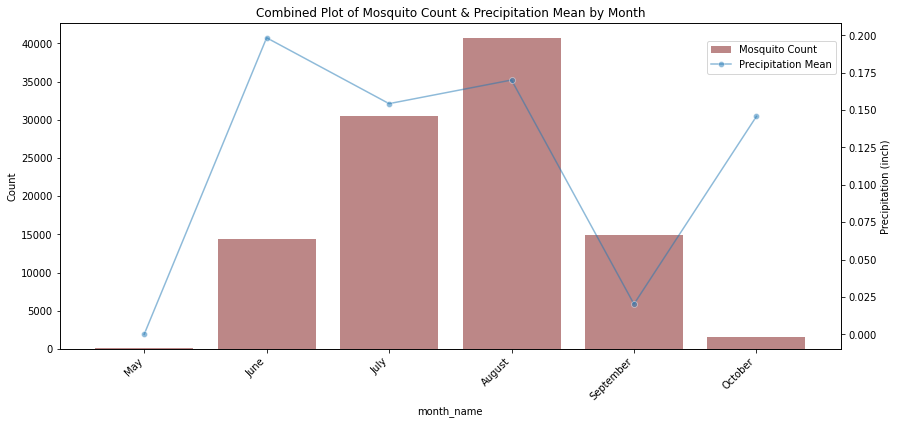

In [24]:
combine_plot(
    dataframe=combined_stats_by_month_df,
    x_axis_column='month_name',
    barplot_column='NumMosquitos_sum',
    lineplot_column='precip_mean',
    barplot_label='Mosquito Count',
    lineplot_label='Precipitation Mean',
    barplot_axis_label='Count',
    lineplot_axis_label='Precipitation (inch)',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of Mosquito Count & Precipitation Mean by Month',
    fig_size=(14,6)
)

The month-centric plot shows the unclear relationship between precipitation and mosquito count.

## Aggregate weather by Week of Year

In [25]:
#.loc[(train_weather_spray.loc[:,'year'] == 2007) | (train_weather_spray.loc[:,'year'] == 2013),:] \
combined_stats_by_week_df = train_weather_spray.groupby('week_of_year') \
                                        .agg(
                                            record_count=('month_of_year','count'),
                                            wetbulb_mean=('WetBulb','mean'), 
                                            tavg_mean=('Tavg','mean'),
                                            wnvpresent_sum=('WnvPresent','sum'),
                                            NumMosquitos_sum=('NumMosquitos_sum','sum'),
                                            precip_mean=('PrecipTotal','mean'),
                                            daylight_duration_mean=('daylight_duration_in_minutes','mean'))
combined_stats_by_week_df.loc[:,'week_of_year'] = combined_stats_by_week_df.index
combined_stats_by_week_df.loc[:,'week_of_year'] = combined_stats_by_week_df.loc[:,'week_of_year'].apply(lambda x: str(x))
combined_stats_by_week_df.reset_index(drop=True, inplace=True)
#combined_stats_by_month_df
#combined_stats_by_year_and_month_df.loc[:,'year'] = combined_stats_by_year_and_month_df.loc[:,'year_and_month'].apply(lambda x: int(x.split('-')[0]))
#combined_stats_by_month_df.loc[:,'month_name'] = combined_stats_by_month_df.loc[:,'month_of_year'].apply(lambda x: calendar.month_name[int(x)])
combined_stats_by_week_df

,record_count,wetbulb_mean,tavg_mean,wnvpresent_sum,NumMosquitos_sum,precip_mean,daylight_duration_mean,week_of_year
0,46,54.000000,59.652174,0,171.0,0.000000,895.000000,21
1,228,53.517544,61.328947,0,1520.0,0.024259,903.429825,22
2,271,55.380074,62.014760,0,3189.0,0.137768,910.084871,23
3,262,66.843511,75.312977,0,2840.0,0.531985,913.595420,24
4,249,65.056225,74.228916,1,4195.0,0.186876,913.160643,25
5,192,66.880208,75.609375,0,2760.0,0.026750,912.338542,26
6,450,64.684444,73.324444,7,7505.0,0.167244,905.084444,27
7,624,65.583333,75.221154,13,12033.0,0.049973,897.065705,28
8,313,65.169329,73.051118,5,4256.0,0.391534,885.009585,29
9,576,67.131944,76.359375,23,10239.0,0.091962,873.076389,30


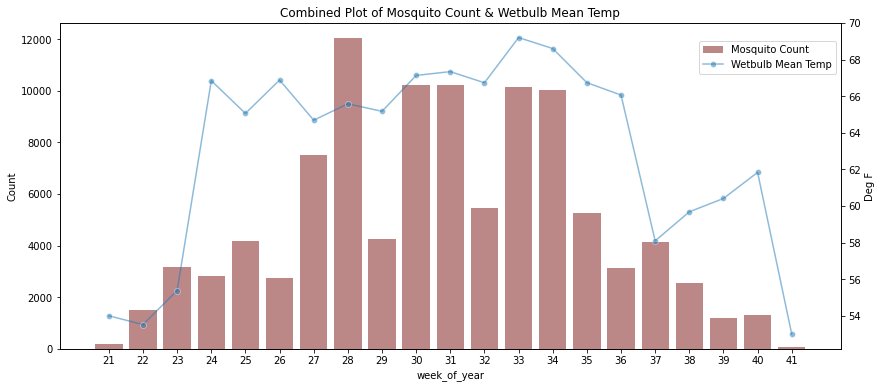

In [26]:
combine_plot(
    dataframe=combined_stats_by_week_df,
    x_axis_column='week_of_year',
    barplot_column='NumMosquitos_sum',
    lineplot_column='wetbulb_mean',
    barplot_label='Mosquito Count',
    lineplot_label='Wetbulb Mean Temp',
    barplot_axis_label='Count',
    lineplot_axis_label='Deg F',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of Mosquito Count & Wetbulb Mean Temp',
    fig_size=(14,6),
    rotate_xtick_labels=False
)

As weekly mean wetbulb temperature stays high between week 24 (start-June) to week 34 (mid-August), mosquito breeding tends to be higher too.

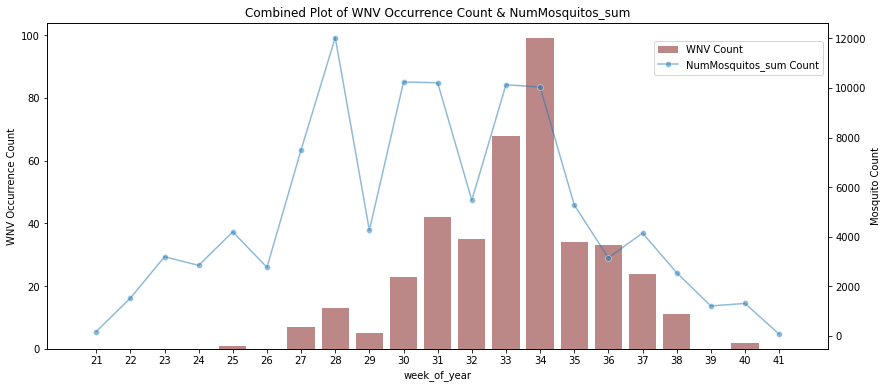

In [27]:
combine_plot(
    dataframe=combined_stats_by_week_df,
    x_axis_column='week_of_year',
    barplot_column='wnvpresent_sum',
    lineplot_column='NumMosquitos_sum',
    barplot_label='WNV Count',
    lineplot_label='NumMosquitos_sum Count',
    barplot_axis_label='WNV Occurrence Count',
    lineplot_axis_label='Mosquito Count',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of WNV Occurrence Count & NumMosquitos_sum',
    fig_size=(14,6),
    rotate_xtick_labels=False
)

Weekly mean values of WNV occurrence and mosquito count tend to top out around the week 33 and 34 period, i.e. 1st half of August.

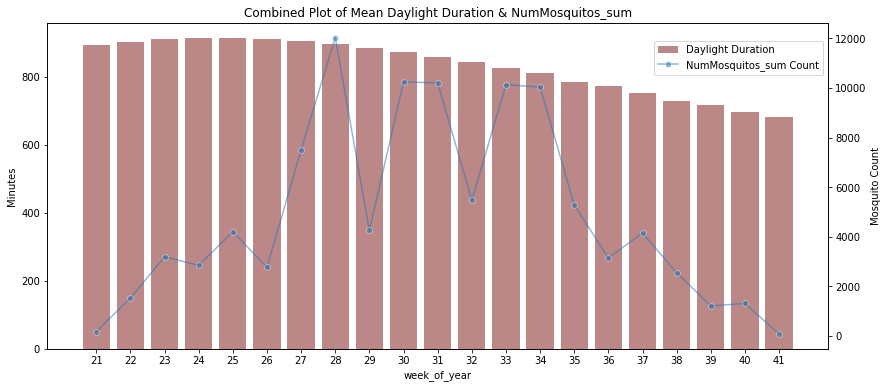

In [28]:
combine_plot(
    dataframe=combined_stats_by_week_df,
    x_axis_column='week_of_year',
    barplot_column='daylight_duration_mean',
    lineplot_column='NumMosquitos_sum',
    barplot_label='Daylight Duration',
    lineplot_label='NumMosquitos_sum Count',
    barplot_axis_label='Minutes',
    lineplot_axis_label='Mosquito Count',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of Mean Daylight Duration & NumMosquitos_sum',
    fig_size=(14,6),
    rotate_xtick_labels=False
)

From above plot, we observe that length of daylight duration gradually decreases from week 27 onwards (start of July), while mosquito count only starts to decrease from week 33 onwards (mid-August). Otherwise, there seems to be no strong trend between daylight duration and mosquito count.

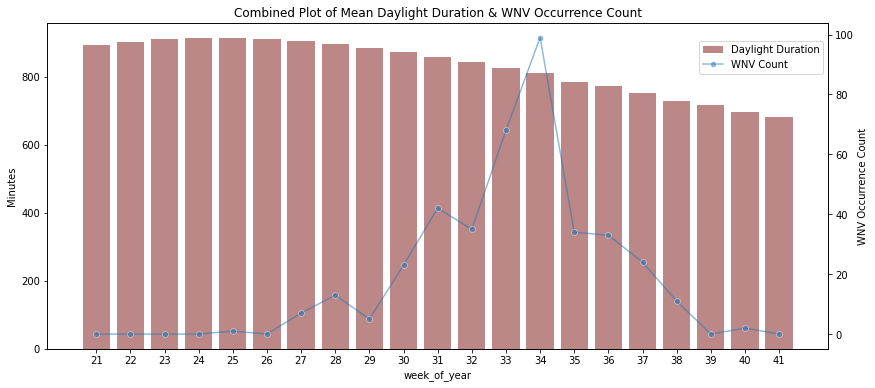

In [29]:
combine_plot(
    dataframe=combined_stats_by_week_df,
    x_axis_column='week_of_year',
    barplot_column='daylight_duration_mean',
    lineplot_column='wnvpresent_sum',
    barplot_label='Daylight Duration',
    lineplot_label='WNV Count',
    barplot_axis_label='Minutes',
    lineplot_axis_label='WNV Occurrence Count',
    legend_anchor_pos=(0.9, 0.85),
    title='Combined Plot of Mean Daylight Duration & WNV Occurrence Count',
    fig_size=(14,6),
    rotate_xtick_labels=False
)

There is also no discernable trend between WNV occurrence and mean daylight duration across the weeks of the year.

## Correlation heatmap of numerical data

In [30]:
train_weather_spray.columns

Index(['Date', 'Species', 'Block', 'Street', 'Trap', 'Latitude', 'Longitude',
       'WnvPresent', 'NumMosquitos_sum', 'species_culex_erraticus',
       'species_culex_pipiens', 'species_culex_pipiens_restuans',
       'species_culex_restuans', 'species_culex_salinarius',
       'species_culex_tarsalis', 'species_culex_territans',
       'species_unspecified_culex', 'month_of_year', 'week_of_year',
       'year_and_month', 'year', 'reference_weather_stn', 'Station', 'Tmax',
       'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed', 'Sunrise_datetime', 'Sunset_datetime', 'CodeSum_BCFG',
       'CodeSum_BR', 'CodeSum_DZ', 'CodeSum_FG', 'CodeSum_FG+', 'CodeSum_FU',
       'CodeSum_GR', 'CodeSum_HZ', 'CodeSum_MIFG', 'CodeSum_RA', 'CodeSum_SN',
       'CodeSum_SQ', 'CodeSum_TS', 'CodeSum_TSRA', 'CodeSum_VCFG',
       'CodeSum_VCTS', 'Tavg_mean_past7day', 'WetBulb_mean_past7day',
    

In [31]:
numerical_columns = list(train_weather_spray.select_dtypes(include=np.number).columns)
numerical_columns = [col for col in numerical_columns if col not in ['Block','reference_weather_stn','Station','year'] and not col.startswith('data_availability') and not col.startswith('sp_count')]

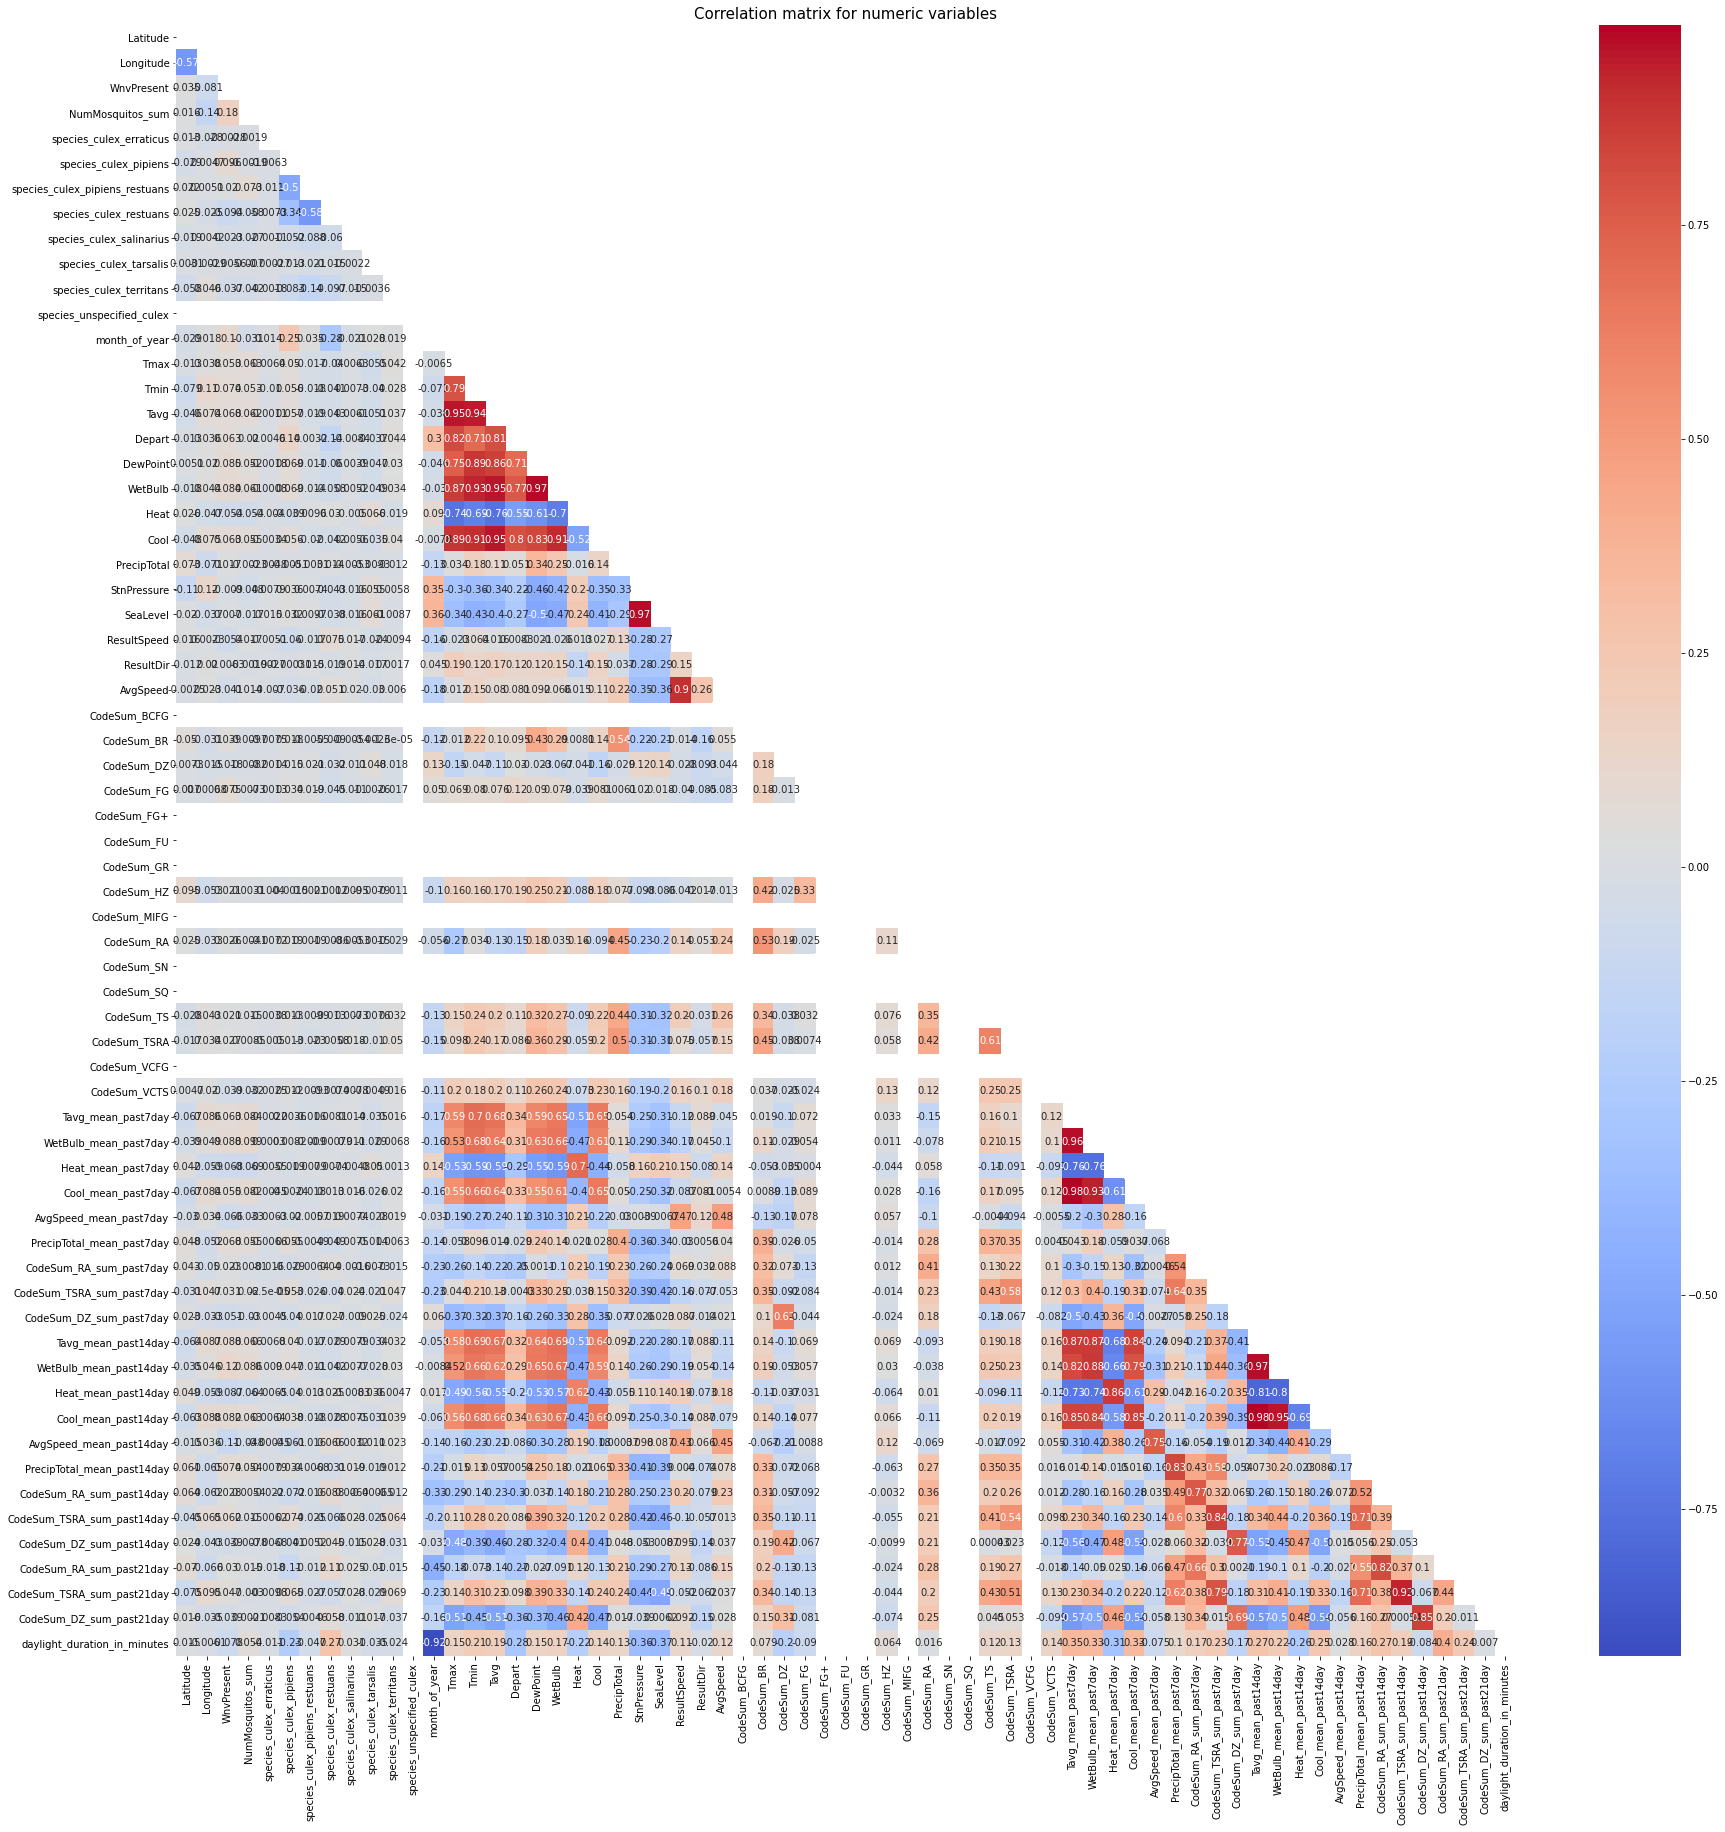

In [32]:
mask = np.triu(train_weather_spray.loc[:, numerical_columns].corr())
plt.figure(figsize = (30,30))
plt.title('Correlation matrix for numeric variables', size = 15);
sns.heatmap(train_weather_spray.loc[:, numerical_columns].corr(), annot = True, 
            cmap = 'coolwarm', mask = mask);

Upon plotting the correlation heatmap of the numerical data, we don't find any significant correlation between the features and the key target variables (WNVPresent and NumMosquitos_sum).

However, as expected, there is strong correlation between related variables such as datetime variables (for instance, week_of_year and month_of_year have a strong positive correlation) and weather variabes (Station Pressure and Sea Level are positively correlated, as are WetBulb and DewPoint). Similarly, we also see strong positive correlation within the past weather variables (for example, CodeSum_TSRA_sum_past14day and CodeSum_DZ_sum_past14day have a strong direct correlation to CodeSum_TSRA_sum_past21day and CodeSum_DZ_sum_past21day respectively) 

At this stage, we will not be dropping any of the features and will undertake further exploratory analysis to better understand the features and examine how they relate to the target variables.

## Boxplot of historical weather data

### Define helper function to plot historical weather data

In [33]:
def subplot_boxplots(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/3))
    ncols = 3
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 4*nrows))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        #sns.countplot(data=dataframe, x=column, ax=ax[i])
        sns.boxplot(data=dataframe, y=column, x='WnvPresent', ax=ax[i], notch=True)
        ax[i].set_title('\'' + column + '\' w.r.t WnvPresent', fontsize=12)
        #plt.setp(ax[i].get_xticklabels(), rotation=90, fontsize=10) # smaller font for x-tick
        ax[i].set_xlabel("")
        ax[i].set_ylabel("")
    if len(list_of_columns) < nrows*ncols:
        for i in range(nrows*ncols - len(list_of_columns)):
            ax[nrows*ncols - 1 - i].set_axis_off() # get rid of empty subplots if they are present
    fig.tight_layout()

### Identify columns that hold historical weather data

In [34]:
weather_historical_data_columns = [c for c in train_weather_spray.columns if '_past' in c and 'sp_count' not in c]
weather_historical_data_columns.sort()
weather_historical_data_columns

['AvgSpeed_mean_past14day',
 'AvgSpeed_mean_past7day',
 'CodeSum_DZ_sum_past14day',
 'CodeSum_DZ_sum_past21day',
 'CodeSum_DZ_sum_past7day',
 'CodeSum_RA_sum_past14day',
 'CodeSum_RA_sum_past21day',
 'CodeSum_RA_sum_past7day',
 'CodeSum_TSRA_sum_past14day',
 'CodeSum_TSRA_sum_past21day',
 'CodeSum_TSRA_sum_past7day',
 'Cool_mean_past14day',
 'Cool_mean_past7day',
 'Heat_mean_past14day',
 'Heat_mean_past7day',
 'PrecipTotal_mean_past14day',
 'PrecipTotal_mean_past7day',
 'Tavg_mean_past14day',
 'Tavg_mean_past7day',
 'WetBulb_mean_past14day',
 'WetBulb_mean_past7day']

### Filter out records with incomplete historical weather data

In [35]:
train_weather_spray_complete = train_weather_spray.loc[(train_weather_spray.loc[:,'data_availability_for_7_days']==7) & \
                                                        (train_weather_spray.loc[:,'data_availability_for_14_days']==14) & \
                                                        (train_weather_spray.loc[:,'data_availability_for_21_days']==21),:]

### Generate boxplots for historical weather data

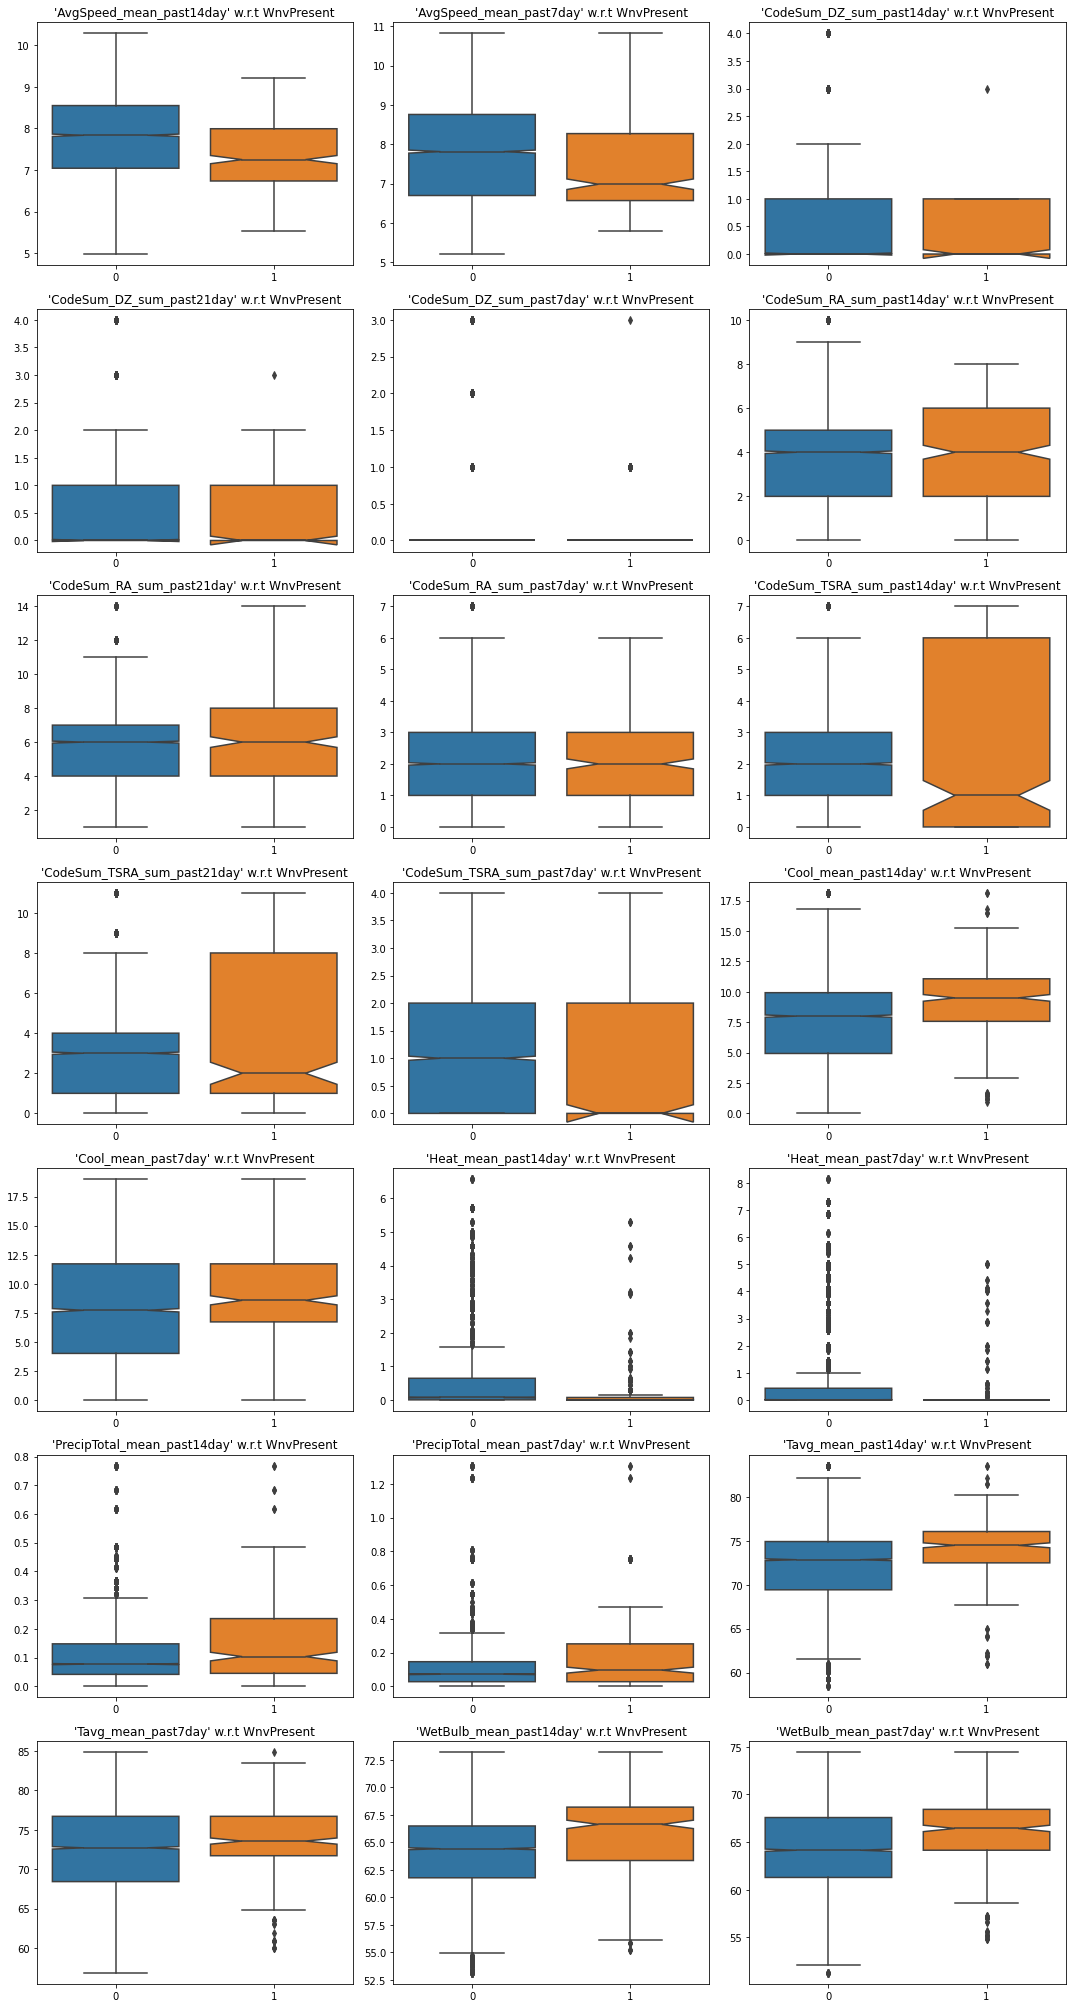

In [36]:
subplot_boxplots(train_weather_spray_complete, weather_historical_data_columns)

### Analyse trends observed in boxplots of historical weather data

From the above charts, medians for WNV-positive and WNV-negative plots in *Tavg_mean_past_14day w.r.t WnvPresent* and *WetBulb_mean_past_14day* comes close to exceeding each other's inter-quartile ranges. In *WetBulb_mean_past7day w.r.t WnvPresent*, the median temperature for WNV-negative plot almost exceeded the inter-quartile range of the WNV-positive plot at the 25th percentile. These observations suggest that temperature has potential in influencing the occurrence of WNV-positive mosquitoes. To be more specific, a higher air temperature is likely more conducive for mosquito breeding.

Looking at *CodeSum_TSRA_sum_past14day w.r.t WnvPresent* and *CodeSum_TSRA_sum_past7day w.r.t WnvPresent*, the median of the WNV-positive plot is nearly exceeding the inter-quartile range of the WNV-negative plot at the 25th percentile. As such, lower incidence of thunderstorm with rain seem to be more conducive for mosquito breeding, leading to higher WNV occurrences.

From the historical weather data perspective, while the discussed trends are weak, the preceeding periods of higher temperatures and possibly low precipitation are conditions that may contribute to the occurrences of WNV-positive mosquitoes.

## Scatterplot of spray done in past 7/14/21 days within 25/50/75 meters vs NumOfMosquitoes

In [37]:
def subplot_scatterplots(dataframe, list_of_columns, y_ax, sup_title='NA'):   
    # Set titles, labels, etc here for each subplot
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) >= 2:
        figsize=(25,20)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=25)   
   
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.scatterplot(x=column, y = y_ax, data=dataframe, color='red', ax=ax[i])
        # Set titles, labels, etc here for each subplot
       
        ax[i].set_title(list_of_columns[i] + ' ' + 'vs' + ' ' + y_ax, fontsize=15)
        ax[i].set_xlabel('Spray Count',fontsize=15)
        ax[i].set_ylabel(y_ax,fontsize=15)
        # Sets the xticks positions in the x-axis, only works if the xticks are numeric
        ax[i].set_xticks(np.arange(max(dataframe[column].unique())+1))
        # Sets the fontsize of both the axis
        ax[i].tick_params(axis='both', labelsize=15)
       
    plt.tight_layout(pad=3.0)
    
    # Removes the last plot as it's empty
    ax.flat[-1].set_visible(False)

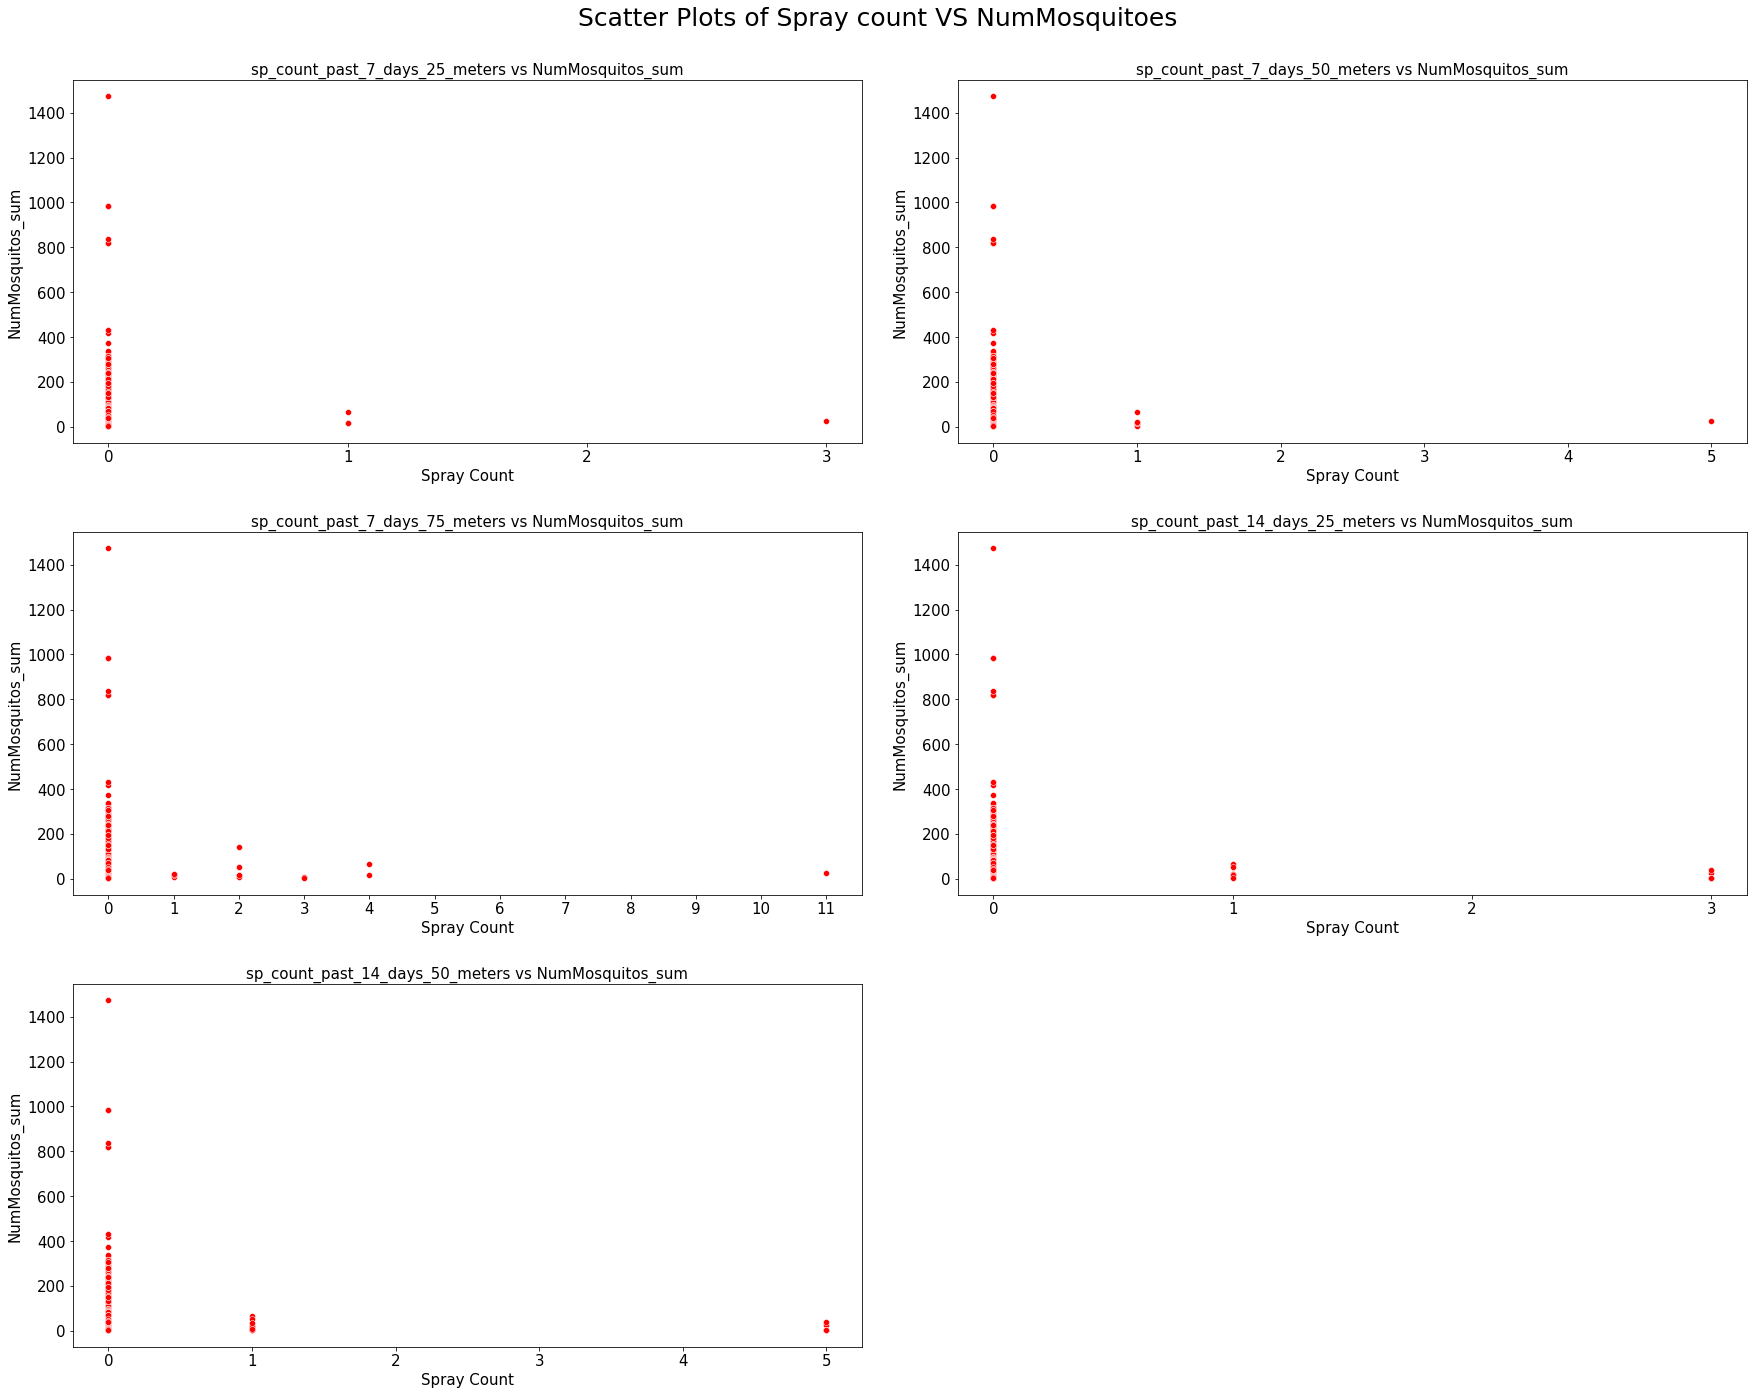

In [38]:
spray = ['sp_count_past_7_days_25_meters', 'sp_count_past_7_days_50_meters',
       'sp_count_past_7_days_75_meters', 'sp_count_past_14_days_25_meters',
       'sp_count_past_14_days_50_meters', 'sp_count_past_14_days_75_meters']

subplot_scatterplots(train_weather_spray, spray, 'NumMosquitos_sum', sup_title='Scatter Plots of Spray count VS NumMosquitoes')

The following `CodeSum` features shows the highest count compared to the other features:
* RA (Rain)
* TSRA (Thunderstorm and Rain)
* DZ (Drizzle)

In [39]:
#columns_to_drop=['Date','Species', 'Block', 'Street','Trap','reference_weather_stn','Station','Tmax','Tmin','Sunrise_datetime','Sunset_datetime','sp_count_past_7_days_25_meters','sp_count_past_7_days_50_meters','sp_count_past_7_days_75_meters','sp_count_past_14_days_25_meters','sp_count_past_14_days_50_meters','sp_count_past_14_days_75_meters','sp_count_past_21_days_25_meters','sp_count_past_21_days_50_meters','sp_count_past_21_days_75_meters','year_and_month','data_availability_for_7_days','data_availability_for_14_days','data_availability_for_21_days','year']
columns_to_drop = ['Date','Species', 'Block', 'Street','Trap','reference_weather_stn','Station','Tmax','Tmin',
                    'Sunrise_datetime','Sunset_datetime','year','year_and_month','NumMosquitos_sum', 'month_name']
historical_spray_columns = [c for c in train_weather_spray.columns if 'sp_count' in c]
data_availability_columns = [c for c in train_weather_spray.columns if 'data_availability' in c]

<AxesSubplot:title={'center':'Count plot for all CodeSum Features'}>

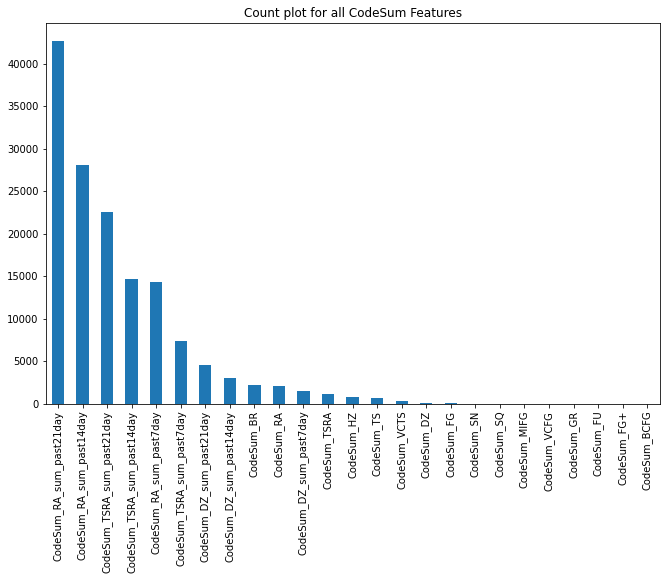

In [40]:
codesum_cols = train_weather_spray.columns[train_weather_spray.columns.str.contains('CodeSum')]

plt.figure(figsize=(11,7))
plt.title('Count plot for all CodeSum Features')
codesum_counts = train_weather_spray[codesum_cols].sum().sort_values(ascending=False)
codesum_counts.plot(kind='bar')

In [41]:
bad_codesum = list(codesum_counts[codesum_counts == 0].index)
bad_codesum

['CodeSum_SN',
 'CodeSum_SQ',
 'CodeSum_MIFG',
 'CodeSum_VCFG',
 'CodeSum_GR',
 'CodeSum_FU',
 'CodeSum_FG+',
 'CodeSum_BCFG']

In [42]:
 columns_to_drop = columns_to_drop + bad_codesum + historical_spray_columns + data_availability_columns
 columns_to_drop

['Date',
 'Species',
 'Block',
 'Street',
 'Trap',
 'reference_weather_stn',
 'Station',
 'Tmax',
 'Tmin',
 'Sunrise_datetime',
 'Sunset_datetime',
 'year',
 'year_and_month',
 'NumMosquitos_sum',
 'month_name',
 'CodeSum_SN',
 'CodeSum_SQ',
 'CodeSum_MIFG',
 'CodeSum_VCFG',
 'CodeSum_GR',
 'CodeSum_FU',
 'CodeSum_FG+',
 'CodeSum_BCFG',
 'sp_count_past_7_days_25_meters',
 'sp_count_past_7_days_50_meters',
 'sp_count_past_7_days_75_meters',
 'sp_count_past_14_days_25_meters',
 'sp_count_past_14_days_50_meters',
 'sp_count_past_14_days_75_meters',
 'data_availability_for_7_days',
 'data_availability_for_14_days',
 'data_availability_for_21_days']

In [43]:
train_weather_spray_final = train_weather_spray.drop(columns=columns_to_drop, errors='ignore')
train_weather_spray_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7370 entries, 0 to 7369
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Latitude                        7370 non-null   float64
 1   Longitude                       7370 non-null   float64
 2   WnvPresent                      7370 non-null   int64  
 3   species_culex_erraticus         7370 non-null   int64  
 4   species_culex_pipiens           7370 non-null   int64  
 5   species_culex_pipiens_restuans  7370 non-null   int64  
 6   species_culex_restuans          7370 non-null   int64  
 7   species_culex_salinarius        7370 non-null   int64  
 8   species_culex_tarsalis          7370 non-null   int64  
 9   species_culex_territans         7370 non-null   int64  
 10  species_unspecified_culex       7370 non-null   int64  
 11  month_of_year                   7370 non-null   int64  
 12  week_of_year                    73

In [44]:
train_weather_spray_final.to_csv('../assets/train_final_v2_daylight.csv', index=False)

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 80 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Id                              116293 non-null  int64         
 1   Date                            116293 non-null  datetime64[ns]
 2   Species                         116293 non-null  object        
 3   Block                           116293 non-null  int64         
 4   Street                          116293 non-null  object        
 5   Trap                            116293 non-null  object        
 6   Latitude                        116293 non-null  float64       
 7   Longitude                       116293 non-null  float64       
 8   AddressAccuracy                 116293 non-null  int64         
 9   species_culex_erraticus         116293 non-null  int64         
 10  species_culex_pipiens           116293 non-null  int64  

In [46]:
test_final = test.drop(columns=columns_to_drop, errors='ignore')
test_columns = ['Id']+[c for c in train_weather_spray_final if c != 'WnvPresent']
#columns_test
test_final = test_final.loc[:, test_columns]
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Id                              116293 non-null  int64  
 1   Latitude                        116293 non-null  float64
 2   Longitude                       116293 non-null  float64
 3   species_culex_erraticus         116293 non-null  int64  
 4   species_culex_pipiens           116293 non-null  int64  
 5   species_culex_pipiens_restuans  116293 non-null  int64  
 6   species_culex_restuans          116293 non-null  int64  
 7   species_culex_salinarius        116293 non-null  int64  
 8   species_culex_tarsalis          116293 non-null  int64  
 9   species_culex_territans         116293 non-null  int64  
 10  species_unspecified_culex       116293 non-null  int64  
 11  month_of_year                   116293 non-null  int64  
 12  week_of_year    

Finalized test dataset has 55 columns as well, as it has the additional *id* column, and no target *WnvPresent* column, when compared to the finalized train dataset.

In [ ]:
test_final.to_csv('../assets/test_final_v2_daylight.csv', index=False)

In [ ]:
test_final.head(2)

,Id,Latitude,Longitude,species_culex_erraticus,species_culex_pipiens,species_culex_pipiens_restuans,species_culex_restuans,species_culex_salinarius,species_culex_tarsalis,species_culex_territans,...,Cool_mean_past14day,AvgSpeed_mean_past14day,PrecipTotal_mean_past14day,CodeSum_RA_sum_past14day,CodeSum_TSRA_sum_past14day,CodeSum_DZ_sum_past14day,CodeSum_RA_sum_past21day,CodeSum_TSRA_sum_past21day,CodeSum_DZ_sum_past21day,daylight_duration_in_minutes
0,1,41.95469,-87.800991,0,0,1,0,0,0,0,...,5.428571,9.95,0.218857,9,5,1,10,7,1,910.0
1,2,41.95469,-87.800991,0,0,0,1,0,0,0,...,5.428571,9.95,0.218857,9,5,1,10,7,1,910.0
